### Import Torch

In [21]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Download CIFAR-10 dataset

In [22]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.CIFAR10(
    root = './data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.CIFAR10(
    root = './data', 
    train = False, 
    transform = ToTensor()
)

Files already downloaded and verified


### Visualize CIFAR-10 dataset

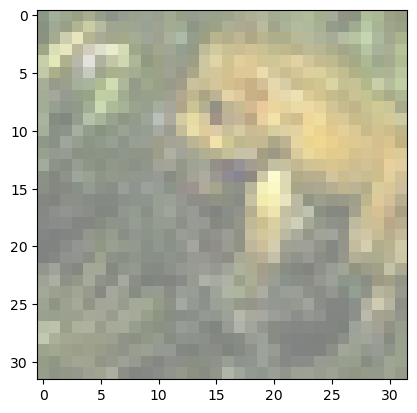

frog


In [23]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

sample_idx = torch.randint(len(train_data), size=(1,)).item()
img, label = train_data[sample_idx]
imshow(torchvision.utils.make_grid(img))
print(f'{classes[label]}')

### Split the training dataset into training and validation datasets

In [24]:
from sklearn.model_selection import train_test_split

# your code here
train_data, val_data = train_test_split(train_data, test_size = 0.1, random_state = 123, shuffle = True)
print(train_data[0][0].size())

torch.Size([3, 32, 32])


### Prepare for the datasets using dataloader

In [25]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    'val'  : torch.utils.data.DataLoader(val_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
}

### Import nn module and pre-trained resent18 from torch

In [26]:
from torch import nn
import torch.nn.functional as F
from torchvision.models import resnet18, ResNet18_Weights

### Set hyperparameters

In [27]:
# Set hyperparameters before building the model
num_classes = 10
batch_size = 100
num_epochs = 5 #너무 오래걸려서 epoch 5가 나을듯.
learning_rate = 0.01 

### Build a pretrained ResNet with FC layer for image classification task

In [31]:
import torchvision.models as models

class Resnet18(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # your code here
        self.rnet = models.resnet18(weights=True)
        ftrs = self.rnet.fc.in_features
        self.rnet.fc = nn.Linear(ftrs , num_classes)


    def forward(self, x):
        # your code here
        x = self.rnet(x)
        return x# your code here
    

model = Resnet18(num_classes).to(device)
print(model)

Resnet18(
  (rnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

### Set a loss function

In [29]:
loss_func = nn.CrossEntropyLoss()  # your code here

### Set an optimizer

In [32]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)   # your code here

### Train the Model

In [36]:
def train(num_epochs, model, loaders):
        
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        # Train the model
        # your code here
        total_loss = 0.0
        for image, label in loaders['train']:
            #print(1)
            output = model(image)
            #label = label.to(device) #GPU 있으면 필요있는 코드?
            loss = loss_func(output, label)
            total_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("total_loss = ", total_loss)

                
        # Validate the model
        # your code here
        with torch.no_grad():
            total_right = 0
            for image, label in loaders['val']:
                output = model(image)
                #label = label.to(device)
                right = (output.max(1)[1] == label).sum()
                total_right += right
            print(total_right / len(loaders['val'].dataset))
        

train(num_epochs, model, loaders)

total_loss =  tensor(859.0302, grad_fn=<AddBackward0>)
tensor(0.3340)
total_loss =  tensor(696.6605, grad_fn=<AddBackward0>)
tensor(0.4866)
total_loss =  tensor(568.1426, grad_fn=<AddBackward0>)
tensor(0.5648)
total_loss =  tensor(488.4698, grad_fn=<AddBackward0>)
tensor(0.6104)
total_loss =  tensor(426.9862, grad_fn=<AddBackward0>)
tensor(0.6562)
total_loss =  tensor(382.0360, grad_fn=<AddBackward0>)
tensor(0.6784)
total_loss =  tensor(343.9857, grad_fn=<AddBackward0>)
tensor(0.6944)
total_loss =  tensor(314.5210, grad_fn=<AddBackward0>)
tensor(0.7064)
total_loss =  tensor(281.3339, grad_fn=<AddBackward0>)
tensor(0.7048)
total_loss =  tensor(254.6227, grad_fn=<AddBackward0>)
tensor(0.7132)


### Evaluate the trained model (compute accuracy on the test dataset)

In [37]:
# Test the model
# your code here

with torch.no_grad():
    total_right = 0
    for image, label in loaders['test']:
        output = model(image)
        label = label.to(device)
        right = (output.max(1)[1] == label).sum()
        total_right += right
    print(f"average accuracy : {total_right/len(loaders['test'].dataset)}")






average accuracy : 0.7229999899864197


### Show the results with randomly selected 10 samples from the test data

In [39]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs
lbls = lbls
test_output = model(imgs[:10])
predicted = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
labels = lbls[:10].cpu().numpy()
print(f"Predicted number: {predicted}")
print(f"Actual number:    {labels}")

Predicted number: [5 8 0 0 6 5 5 2 5 1]
Actual number:    [3 8 8 0 6 6 1 6 3 1]
